In [1]:
#install.packages("tidyquant")
#install.packages("ggplot2")
#install.packages("stringi")
library(tidyquant)
library(ggplot2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyquant packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyquant 1.0.11 ──
✔ PerformanceAnalytics 2.0.8      ✔ quantmod             0.4.26
✔ TTR                  0.24.4     ✔ xts                  0.14.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()         masks base::as.Date.numeric()
✖ PerformanceAnalytics::legend() masks graphics::legend()
✖ quantmod::summary()            masks base::summary()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# install.packages("showtext")
# install.packages("sysfonts")
library(showtext) # 用于添加自定义字体
library(sysfonts) # showtext 的依赖，用于添加系统字体

# 添加中文字体
# 如果是 Windows 系统，可以尝试 "SimHei" 或 "Microsoft YaHei"
# 如果是 macOS 系统，可以尝试 "STHeiti", "PingFang SC"
# 如果是 Linux 系统，确保安装了中文字体，比如 "Noto Sans CJK SC"
font_add_google("Noto Sans SC", "NotoSansSC") # 从 Google Fonts 下载并添加思源黑体（简体中文）
# 或者，手动添加本地字体，例如：
# font_add("SimHei", regular = "C:/Windows/Fonts/simhei.ttf") # Windows 示例
# font_add("PingFangSC", regular = "/System/Library/Fonts/PingFang.ttc") # macOS 示例

# 开启 showtext 渲染，让 ggplot2 可以使用新添加的字体
showtext_auto()

# 设置一个全局的字体大小基础值（可选，但通常有助于美观）
theme_set(theme_minimal(base_family = "NotoSansSC", base_size = 12)) # 设置默认字体和大小
options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 150)

In [3]:
# 获取 Apple 股票数据
aapl_data <- tq_get("AAPL", from = "2024-01-01", to = "2025-12-31")

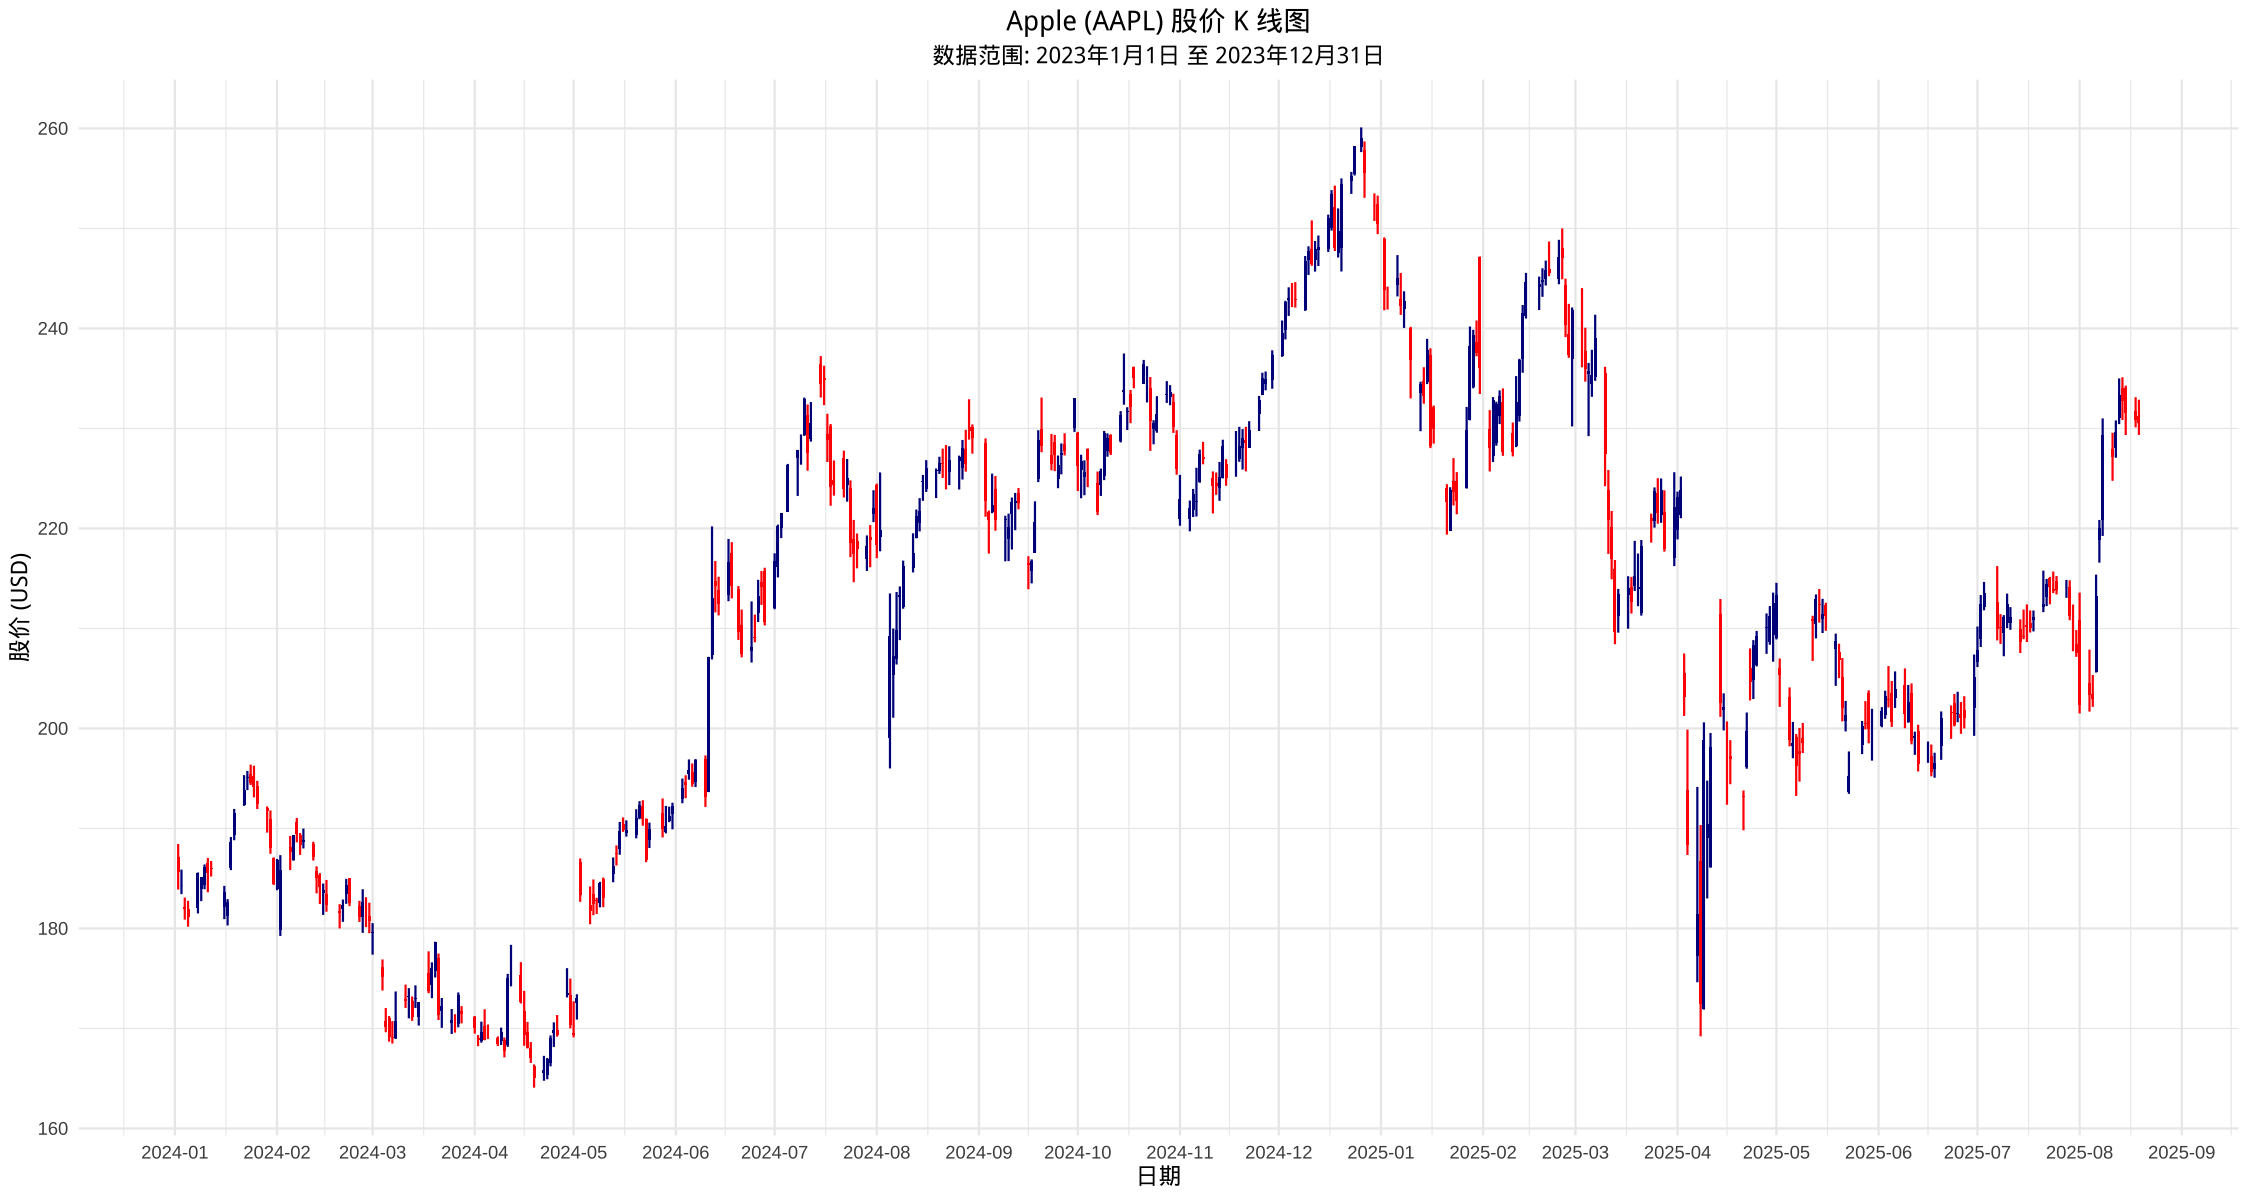

In [6]:
# 绘制 K 线图
aapl_data %>%
  ggplot(aes(x = date, open = open, high = high, low = low, close = close)) +
  geom_candlestick() +
  labs(title = "Apple (AAPL) 股价 K 线图",
       subtitle = "数据范围: 2023年1月1日 至 2023年12月31日",
       x = "日期",
       y = "股价 (USD)") +
  theme_minimal() +
  scale_x_date(date_breaks = "1 month", date_labels = "%Y-%m") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 49 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 199 rows containing missing values or values outside the scale range (`geom_line()`).”


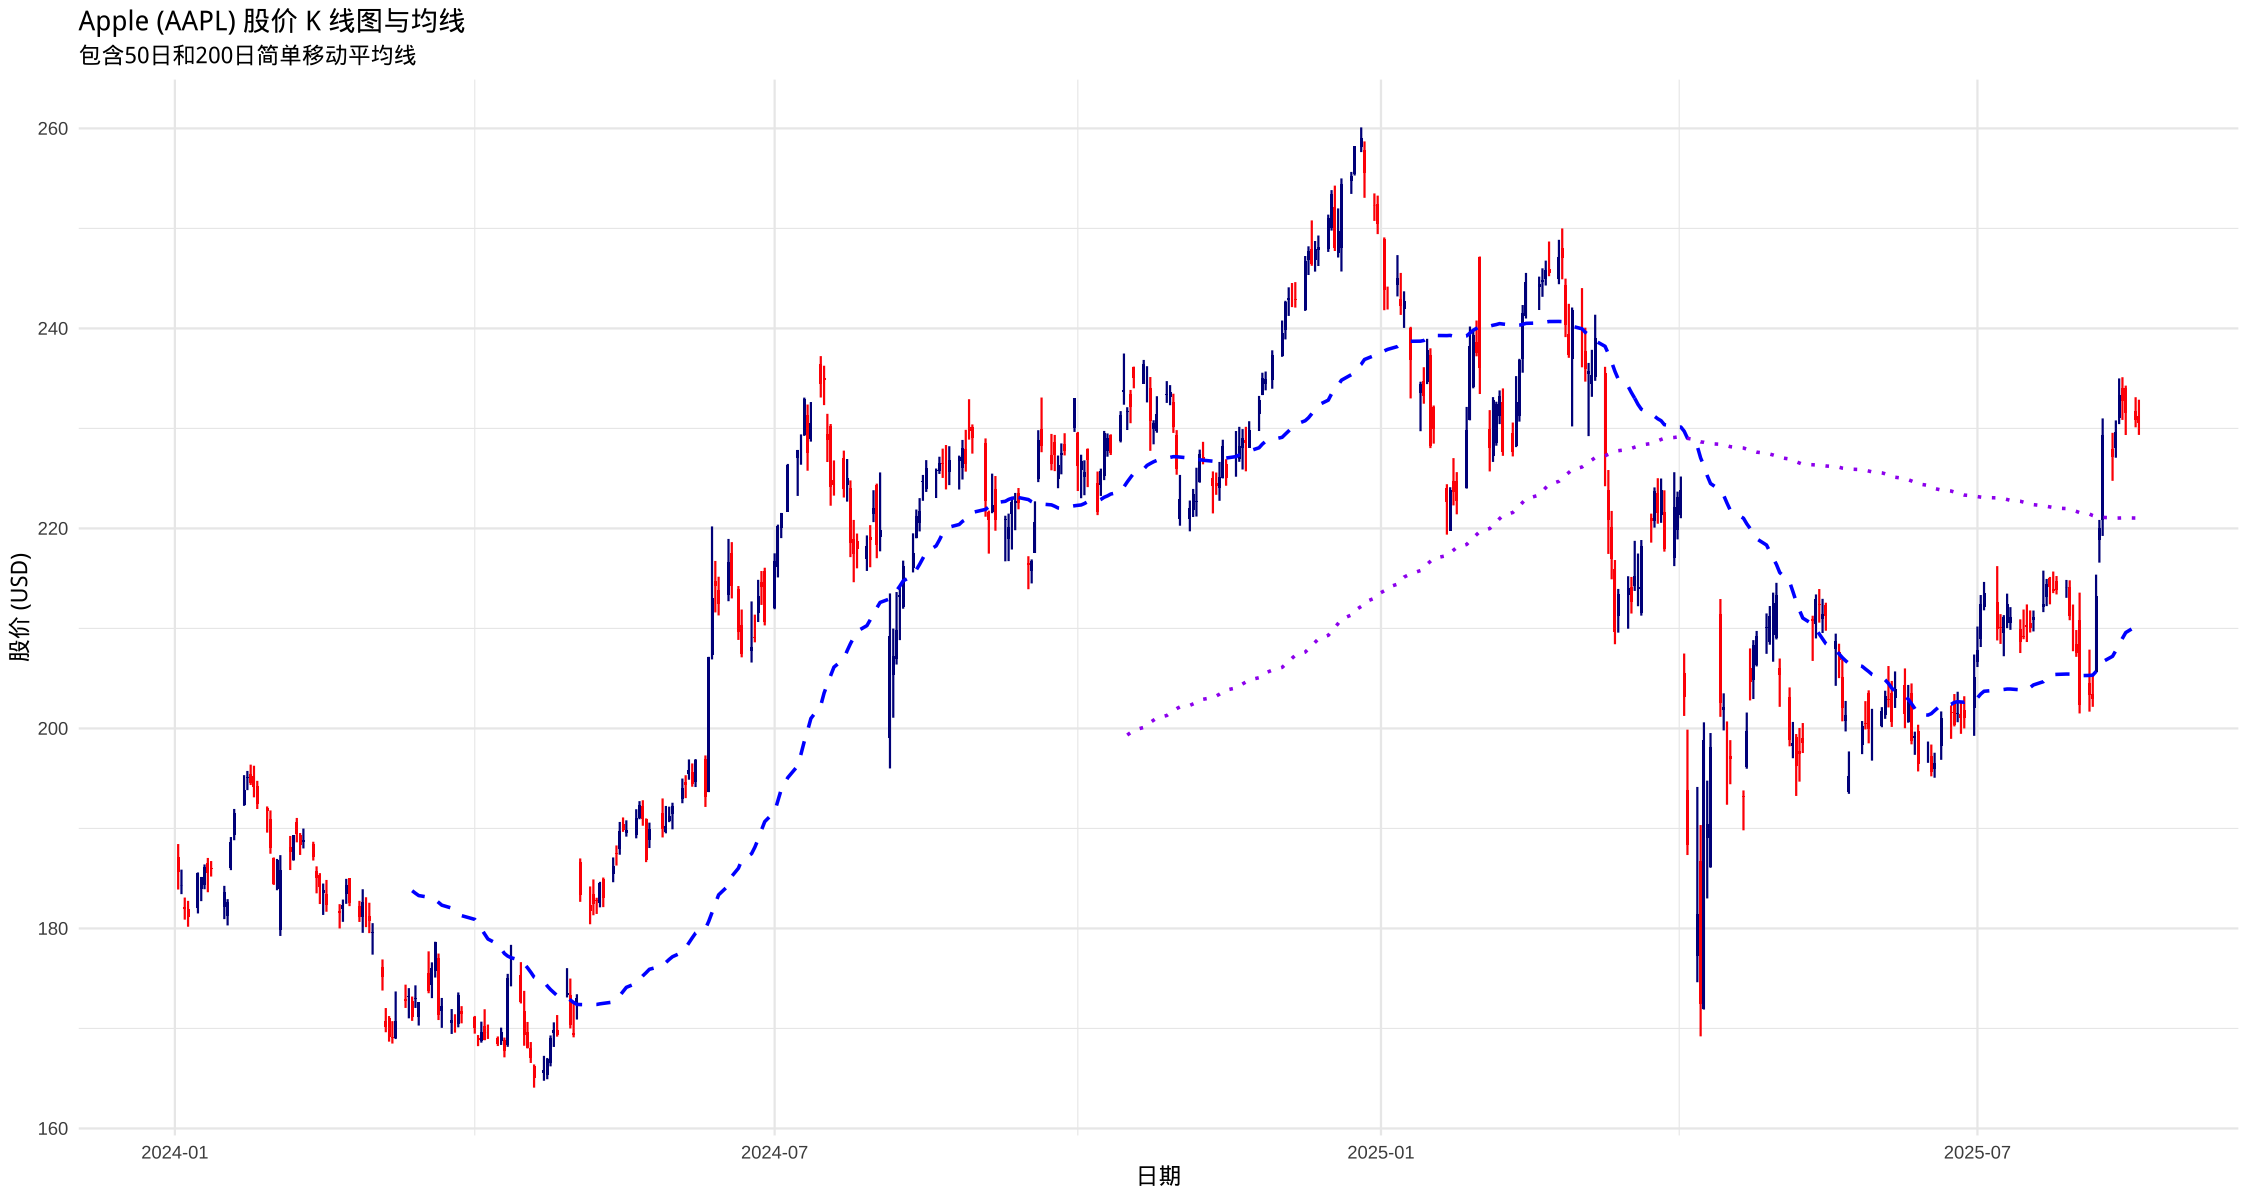

In [7]:
aapl_data <- aapl_data %>%
  tq_mutate(select = close,
            mutate_fun = SMA, # 简单移动平均线
            n = 50,
            col_rename = "SMA_50") %>%
  tq_mutate(select = close,
            mutate_fun = SMA,
            n = 200,
            col_rename = "SMA_200")

aapl_data %>%
  ggplot(aes(x = date, open = open, high = high, low = low, close = close)) +
  geom_candlestick() +
  geom_line(aes(y = SMA_50), color = "blue", linetype = "dashed", size = 0.8) +
  geom_line(aes(y = SMA_200), color = "purple", linetype = "dotted", size = 0.8) +
  labs(title = "Apple (AAPL) 股价 K 线图与均线",
       subtitle = "包含50日和200日简单移动平均线",
       x = "日期",
       y = "股价 (USD)") +
  theme_minimal()

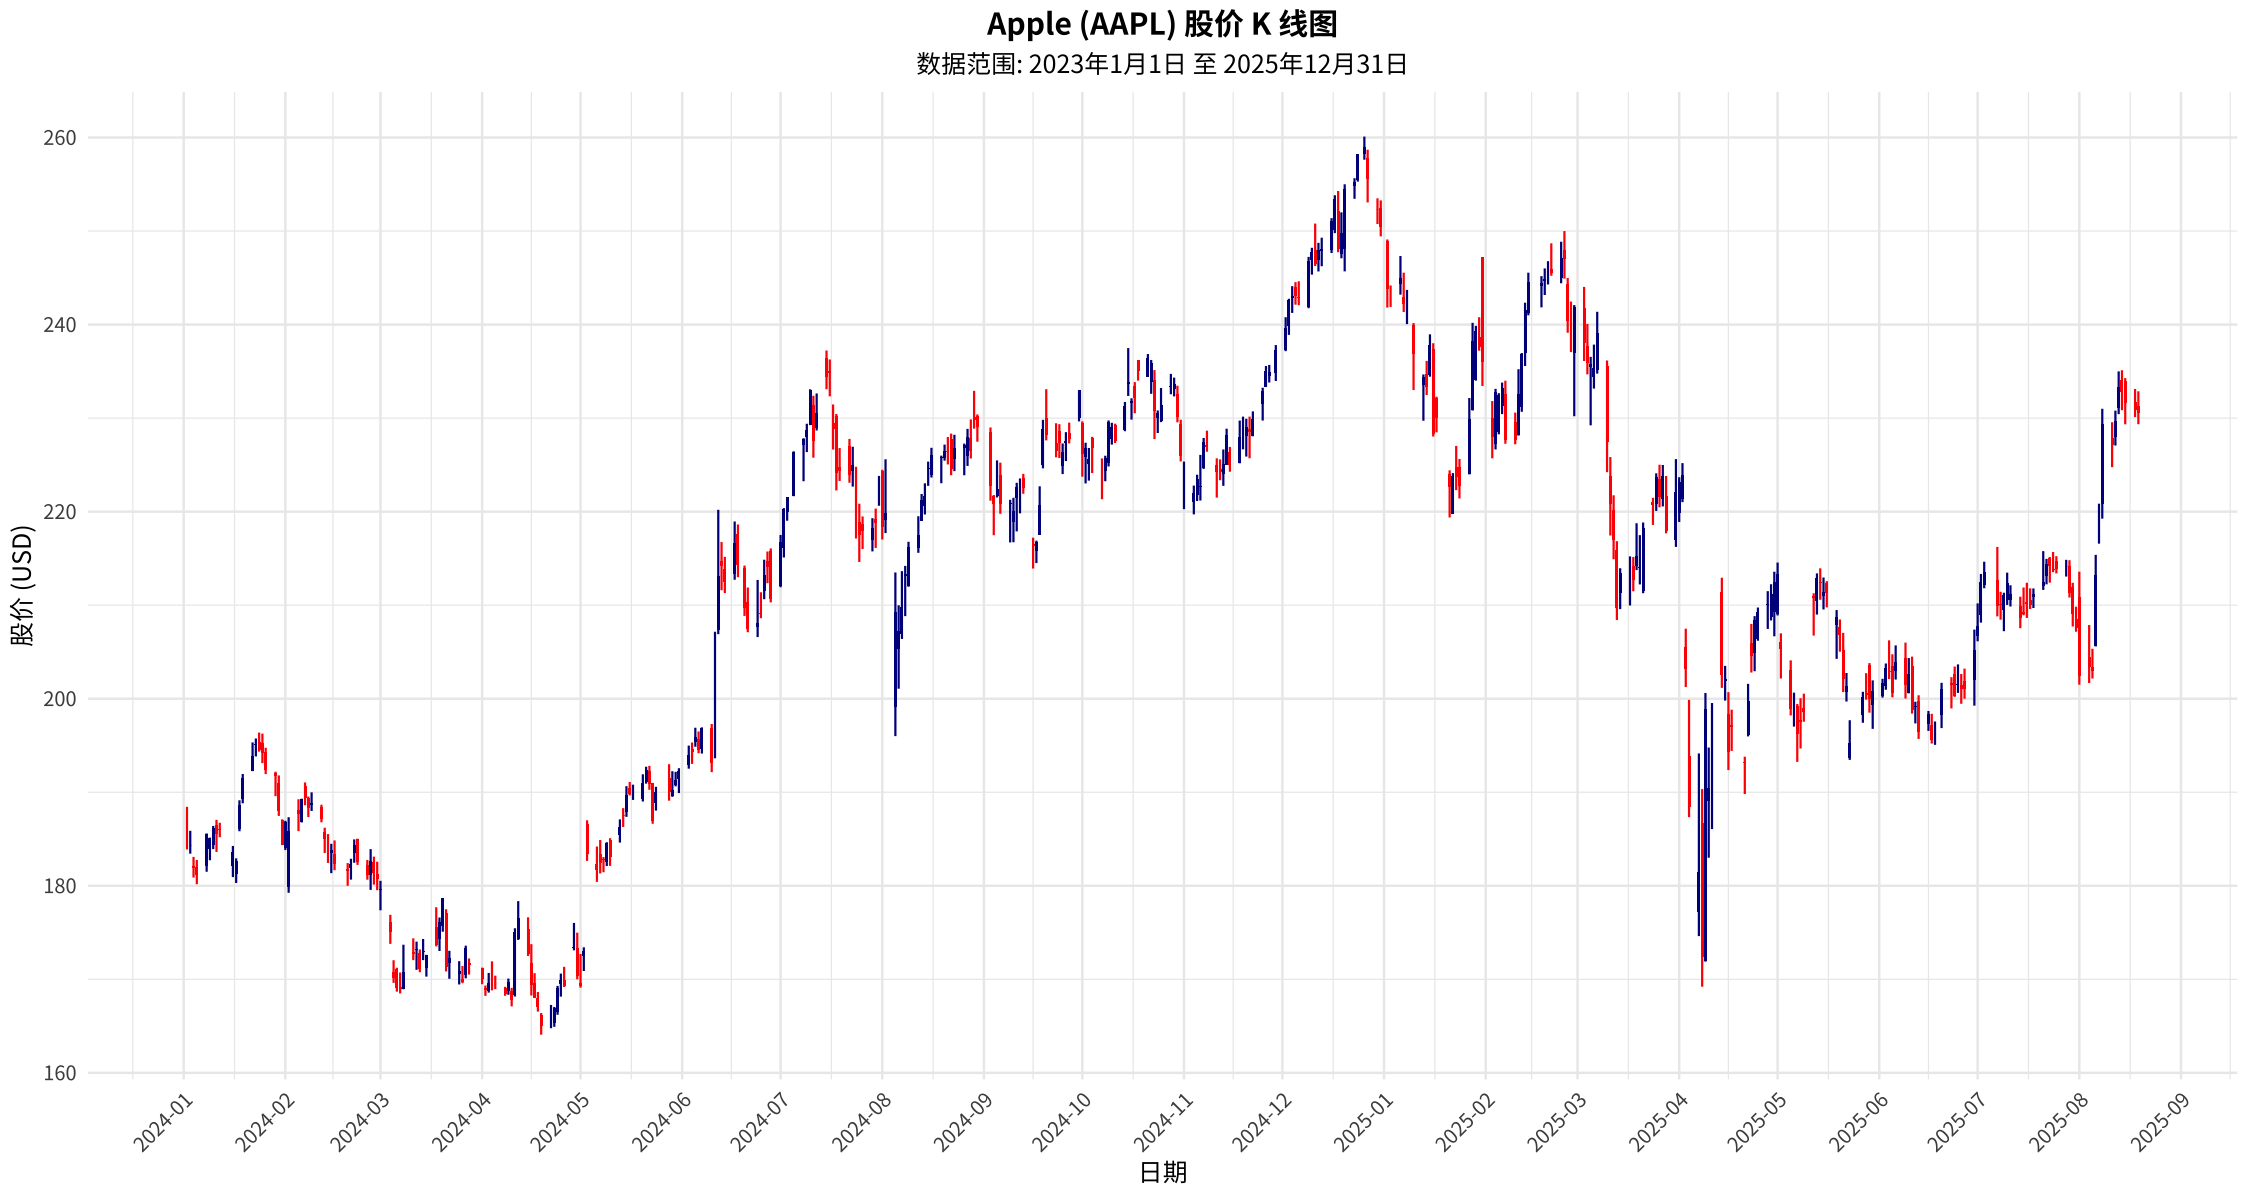

In [8]:
# 绘制 K 线图
aapl_plot <- aapl_data %>%
  ggplot(aes(x = date, open = open, high = high, low = low, close = close)) +
  geom_candlestick() +
  labs(title = "Apple (AAPL) 股价 K 线图",
       subtitle = "数据范围: 2023年1月1日 至 2025年12月31日",
       x = "日期",
       y = "股价 (USD)") +
  # 因为上面已经用 theme_set 设置了 base_family，这里可以省略 theme_minimal(base_family = "NotoSansSC")
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1)) + # 旋转X轴标签，避免重叠
  scale_x_date(date_breaks = "1 month", date_labels = "%Y-%m")

# 打印图像
print(aapl_plot)